In [91]:
import numpy as np

# 1. F = G*m1*m2*factor/r^2
def calc_force(m1:float, m2: float,r: float,h: float) -> float:
    """
    Calculates the gravitational pull made by an object.

    This function calculates the gravitational force exerted by a 
    mass (m1) into an object of mass (m2), taking into account
    distance between masses, and planets radius.

    Args:
        m1 (float): mass of first object (kg)
        m2 (float): mass of second object (kg)
        r (float): radius of the more massive object (m)
        h (float): height with respect to planets outer layer (m)

    Returns:
        f (float): gravitanional pull made by the first object to the second (N)
    """
    G = 6.674*(10**(-11))
    return G*m1*m2/((r+h)**2)
    
    
# 2.Parameters
samples = 1000

# Generate our sintetic data
m1 = np.random.uniform(1e20, 1e24, samples) # more massive object
m2 = np.random.uniform(1+1e-10, 1e5, samples) # less massive object
r = np.random.uniform(1e4, 1e6, samples) # m1 planet radius
h = np.random.uniform(-r+1e-9, 2000,samples) # Height with respect to the surface of the first object
data = []
for i in range(samples):
    f = calc_force(m1[i],m2[i],r[i],h[i])
    data.append([m1[i],m2[i],r[i],h[i],f])

# convert to np for AI model
data = np.array(data)
print(data[:5])

[[ 7.77412676e+23  2.57313837e+04  2.73899427e+05 -5.13494613e+04
   2.69554073e+07]
 [ 1.52167353e+23  2.38565425e+04  5.49001051e+05 -4.79781890e+05
   5.05664570e+07]
 [ 3.89981876e+23  6.61054658e+04  5.90362122e+05 -4.90056205e+05
   1.71007396e+08]
 [ 3.87640075e+23  3.38907839e+04  9.15010534e+05 -8.53688736e+04
   1.27384147e+06]
 [ 2.00924721e+23  9.82181282e+04  3.27306678e+05 -1.78588082e+05
   5.95498499e+07]]


In [92]:
from sklearn.model_selection import train_test_split

# split into train_val 80% and test 20%
train_val_set, test_set = train_test_split(data, test_size=0.2)

# From the train set, segregate between train and validation
train_set, val_set = train_test_split(train_val_set, test_size=0.2)

# split into x and y
x_train = train_set[:, :4]
y_train = train_set[:, 4]
x_val = val_set[:, :4]
y_val = val_set[:, 4]
x_test = test_set[:, :4]
y_test = test_set[:, 4]

from sklearn.preprocessing import StandardScaler

# 3.Data preprocessing

# Apply normalization to our features (m1,m2,r,h)
x_scaler = StandardScaler()
x_train_scaled = x_scaler.fit_transform(x_train)
x_val_scaled = x_scaler.transform(x_val)
x_test_scaled = x_scaler.transform(x_test)

# Apply normalization to our output (f)
y_scaler = StandardScaler()
y_train_scaled = y_scaler.fit_transform(y_train.reshape(-1, 1))
y_val_scaled = y_scaler.transform(y_val.reshape(-1, 1))
y_test_scaled = y_scaler.transform(y_test.reshape(-1, 1))

In [93]:
# 4.Designing our model
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Input


def build_functional_model(input_dim):
    """ Build a 4-layer MLP

    This is an example of how to build a model using the functional model from the keras library.
    The only functional block has three layers,1 input layer, two hidden layers and one output layer.

    Arg:
        input_dim (int): input dimension, number of features

    Returns:
        model (model): Functional model
    """

    inputs = Input(shape=(input_dim,), name="input_layer")
    x = Dense(10, activation="relu", name="hidden_layer_1")(inputs)
    outputs = Dense(1, activation="linear", name="output_layer")(x)

    model = Model(inputs=inputs, outputs=outputs)

    return model

# 5. Compile the model
input_dim = 4
model = build_functional_model(input_dim)
model.compile(optimizer="adam", loss="mse", metrics=["mae"])

history = model.fit(x=x_train_scaled, y=y_train_scaled, validation_data=(x_val_scaled, y_val_scaled), epochs=40)

Epoch 1/40
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 1.3341 - mae: 0.5336 - val_loss: 0.3839 - val_mae: 0.4751
Epoch 2/40
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.2151 - mae: 0.4624 - val_loss: 0.2590 - val_mae: 0.3982
Epoch 3/40
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.1460 - mae: 0.4108 - val_loss: 0.1896 - val_mae: 0.3462
Epoch 4/40
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.1055 - mae: 0.3711 - val_loss: 0.1470 - val_mae: 0.3096
Epoch 5/40
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.0782 - mae: 0.3384 - val_loss: 0.1192 - val_mae: 0.2807
Epoch 6/40
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.0594 - mae: 0.3117 - val_loss: 0.0999 - val_mae: 0.2581
Epoch 7/40
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.0440 - mae: 0.2921 - val_loss: 0.0910 - val_mae: 0.2442
Epoch 8/40
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.0350 - mae: 0.2733 - val_loss: 0.0780 - val_mae: 0.2260
Epoch 9/40
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.0256 - mae: 

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


C:\Users\joral\AppData\Local\Temp\ipykernel_10276\2471002460.py:62: RuntimeWarning: overflow encountered in exp
  y_pred1 = np.exp(y_pred)


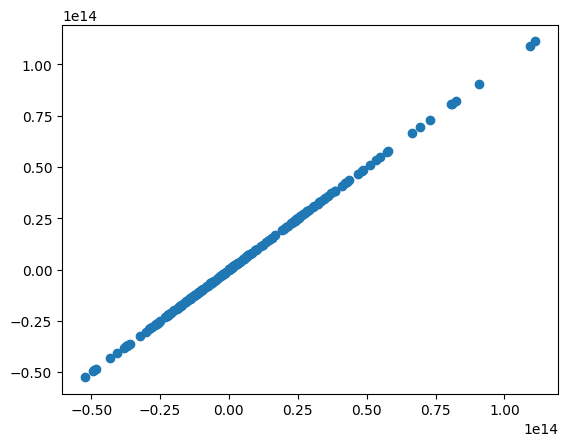

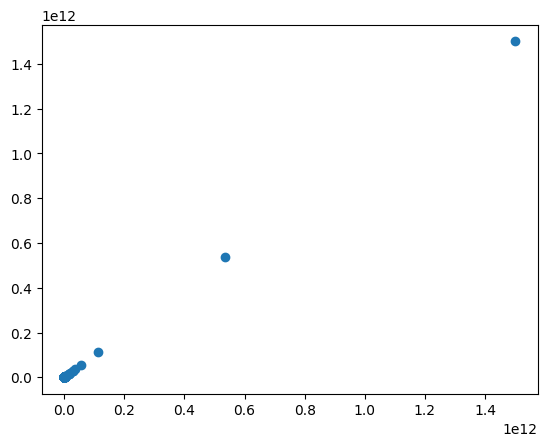

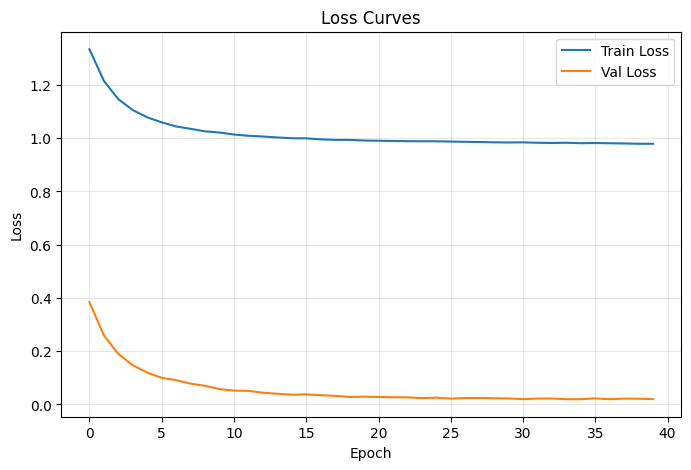

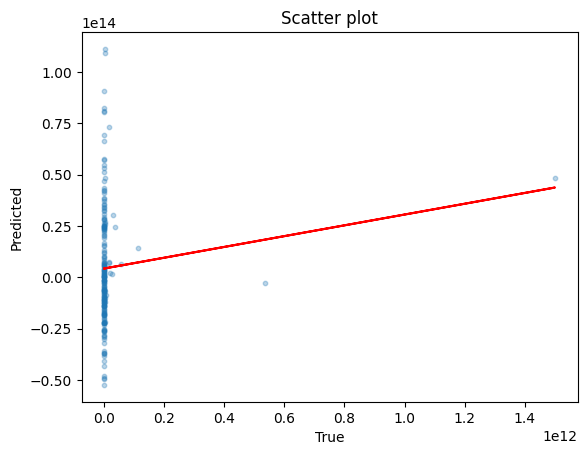

{'mae': 21135472199864.0, 'medianae': 15931186328256.88, 'mse': 8.403157840182809e+26, 'r2': 0.010672686980349844, 'mape': 267685444.2822614, 'mspe': np.float64(1.2724736317188727e+19), 'medianape': np.float64(506748.10437965207)}


ValueError: Input y contains infinity or a value too large for dtype('float32').

In [94]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_absolute_error, mean_absolute_percentage_error, mean_squared_error, median_absolute_error
from sktime.performance_metrics.forecasting import mean_squared_percentage_error, median_absolute_percentage_error

# Evaluate our model
def plot_training_curves(history):
    """
    This function plots teh training and validation curves.

    I will use this function to see if the training went correctly and to check for possible over/under fitting of my
    model. If there is a sudden separation of the training and validation curves, that may indicate overfitting.

    Args:
        history (keras.history): history of my model
    """
    plt.figure(figsize=(8,5))
    plt.plot(history.history["loss"],label="Train Loss")
    plt.plot(history.history["val_loss"], label="Val Loss")
    plt.title("Loss Curves")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()

def plot_scatter(y_test, y_pred):
    """
    Plot the scatter plot with my test set

    This function plots the scatter plot of one of the set and the regression line to see how well our model fits
    the predictions

    Args:
        y_test (array): test set
        y_pred (array): predictions
    Returns:
        r2: R2 score
    """

    linear_regression = LinearRegression().fit(y_test.reshape(-1,1), y_pred.reshape(-1,1))
    y_fit = linear_regression.predict(y_test.reshape(-1,1))

    r2 = r2_score(y_pred, y_fit)

    plt.figure()
    plt.scatter(y_test, y_pred, label="Test", alpha=0.3, s=10)
    plt.plot(y_test, y_fit, "-r", label=f"Linear Fit (R^2 = {round(r2, 5)})")
    plt.title("Scatter plot")
    plt.xlabel("True")
    plt.ylabel("Predicted")
    plt.show()

    return r2

# Como hemos escalado la información que teníamos, entonces trabajamos ahora sobre los datos escalados
y_pred_scaled = model.predict(x_test_scaled).flatten()
y_pred_scaled = np.array(y_pred_scaled).reshape(-1,1)

y_pred = y_scaler.inverse_transform(y_pred_scaled)

y_pred1 = np.exp(y_pred)
y_test1 = np.exp(y_test_scaled)

plt.scatter(y_pred,y_pred)
plt.show()
plt.scatter(y_test,y_test)
plt.show()


plot_training_curves(history)
r2 = plot_scatter(y_test, y_pred)


def further_evaluation(y_test, y_pred, r2):
    """
    Calculate all the metrics

    This function is necessary to calculate all the metrics with the predictions
    on the test set. They are different from the metrics that you obtain while
    training and from which you could also extract information in case your training
    is not procceding as expected.

    Args:
       y_test (numpy_array): true values
       y_pred (numpy_array): predicted values
       r2 (float32): correlation coefficient

    Returns:    
       (dict): Dictionary containing the metrics
    """

    metrics = {
        "mae" : mean_absolute_error(y_test, y_pred),
        "medianae" : median_absolute_error(y_test, y_pred),
        "mse" : mean_squared_error(y_test, y_pred),
        "r2" : r2,
        "mape" : mean_absolute_percentage_error(y_test, y_pred),
        "mspe" : mean_squared_percentage_error(y_test, y_pred),
        "medianape" : median_absolute_percentage_error(y_test, y_pred)
    }
    return metrics 



metrics = further_evaluation(y_test, y_pred, r2)
print(metrics)

r21 = plot_scatter(y_test1, y_pred1)
metrics = further_evaluation(y_test1, y_pred1, r21)
print(metrics)